In [73]:
import numpy as np
import pandas as pd
import os
import torch.utils.data as data

from matplotlib import pyplot as plt
from matplotlib import colors
import torchvision.transforms as transforms

In [2]:
cd ..

c:\Users\USER\playground\2022


In [5]:
args = {
    'BATCH_SIZE': 16,
    'LEARNING_RATE': 1e-5,
    'NUM_EPOCH': 1000
}

W,H = 616,24
EPS = 1e-5

#address for data


address = "./"
address_weather = "./data/weather_data/"
address_data = "./data/"
address_data_pv = "./data/pv_data/"
addr_model = "./model/"
address_merged_bell = "./data/data_merged/bell/"
address_merged_nonbell = "./data/data_merged/nonbell/"

In [6]:
df_sample = pd.read_csv(address_data+'pv_all_values.csv')
df_site_info = pd.read_csv(
    address_data+'data_each_PV_info_20191201_20210814(bell).csv', index_col=0)


In [ ]:
def mkdata():
    site_nums = df_sample.columns[3:]

    for i,_ in enumerate(site_nums):

        near_site = df_site_info.loc[int(site_nums[i]),"nearest_site_name"]
        is_bell = df_site_info.loc[int(site_nums[i]),"bell"]
        df_weather = pd.read_csv(address_weather+"OBS_ASOS_TIM_merged_{}_imputed.csv".format(near_site))
        pv_df = df_sample[site_nums[i]]
        pv_df.name = "Load"
        weather_df = df_weather[df_weather.columns[4:]]
        merged_data = pd.concat([pv_df,weather_df],axis=1)

        if is_bell:
            merged_data.to_csv(address_merged_bell+"merged_{}.csv".format(site_nums[i]),encoding='utf-8-sig')
        else:
            merged_data.to_csv(address_merged_nonbell+"merged_{}.csv".format(site_nums[i]),encoding='utf-8-sig')
        

In [ ]:
def load_data():
    site_nums = df_sample.columns[3:]
    

In [7]:
site_nums = df_sample.columns[3:]

In [14]:
df_pwdata = pd.read_csv(address_merged_nonbell+"merged_{}.csv".format(site_nums[0]),index_col=0)

In [18]:
df_pwdata

,Load,Temp,Wind,Humid,Cloud
0,0.00000,6.6,1.4,71.0,6.000000
1,0.00000,6.0,0.0,77.0,9.000000
2,0.00000,6.1,0.7,75.0,10.000000
3,0.00000,6.0,0.1,79.0,10.000000
4,0.00000,5.6,0.4,84.0,10.000000
...,...,...,...,...,...
14947,0.05580,24.6,0.9,85.0,6.333333
14948,0.05456,24.0,0.1,86.0,7.000000
14949,0.05420,23.2,0.8,91.0,2.000000
14950,0.01208,23.0,0.6,91.0,6.000000


In [21]:
pw_arr = df_pwdata.values.reshape(-1,24,5)

In [41]:
pw_arr.shape

(623, 24, 5)

In [44]:
def vis_yearly(arr):
    plt.figure()
    for i in range(len(arr)):
        plt.plot(arr[i][:,0],alpha=0.03)

In [48]:
def vis_daily(arr,day_num):
    plt.figure()
    plt.plot(arr[day_num][:,0],alpha=0.33)

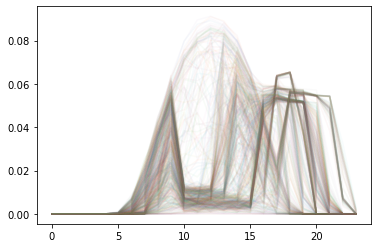

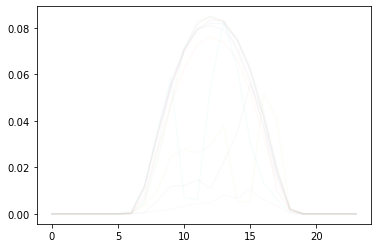

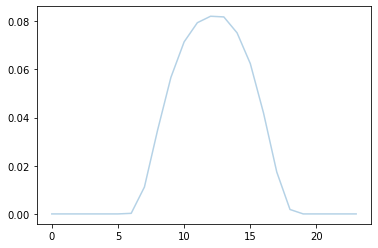

In [67]:
vis_yearly(pw_arr)
vis_yearly(pw_arr[110:120])
vis_daily(pw_arr,110) 

In [93]:
class PV_data(data.Dataset):
    def __init__(self, pw_arr,pv_num, transform):
        # self.data = np.expand_dims(pw_arr,1)/
        self.data = pw_arr
        self.pv_num = pv_num
        self.transform = transform

    def value(self, num):
        val = self.df_pv[num].values
        return val

    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        img_tensor = self.transform(self.data)
        return img_tensor


In [94]:
class ImageTransform():

    def __init__(self):
        pass

    def __call__(self, img):
        mean = 0
        std = img.max()
        self.data_transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize(mean+EPS, std+EPS)
        ])
        return self.data_transform(img)


In [95]:
pw_arr.shape

(623, 24, 5)

In [96]:
A = PV_data(pw_arr,950,transform=ImageTransform())

In [97]:
A.data.shape

(623, 24, 5)

In [99]:
A[0].shape

torch.Size([5, 623, 24])

In [ ]:
# Data INPUT : (B,C,W,H) -> (?,1,24,5) (여기서 W,H는 각각 num_day,day_len)
